# STEP #1: IMPORT LIBRARIES AND DATASET

In [156]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [157]:
# Alternatif, kamu bisa menggunakan dataset yang sudah disediakan oleh keras:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

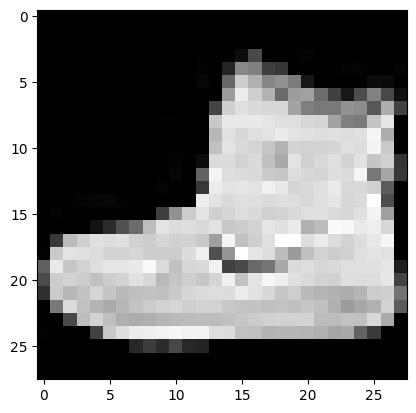

In [158]:
# Menampilkan gambar pertama dari dataset
plt.imshow(X_train[0], cmap="gray")

In [159]:
X_train.shape

(60000, 28, 28)

In [160]:
X_test.shape

(10000, 28, 28)

# STEP #2: PERFORM DATA VISUALIZATION

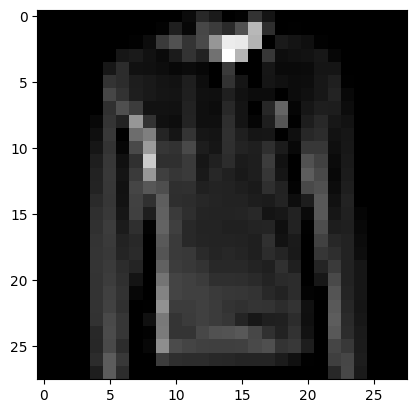

In [161]:
# Menampilkan gambar secara acak
i = random.randint(1,60000)  # Pilih indeks acak antara 1 hingga 60.000
plt.imshow(X_train[i], cmap='gray')  # Tampilkan gambar

In [162]:
label = y_train[i]  # Menampilkan label gambar
label  # Menampilkan label kelas gambar

np.uint8(2)

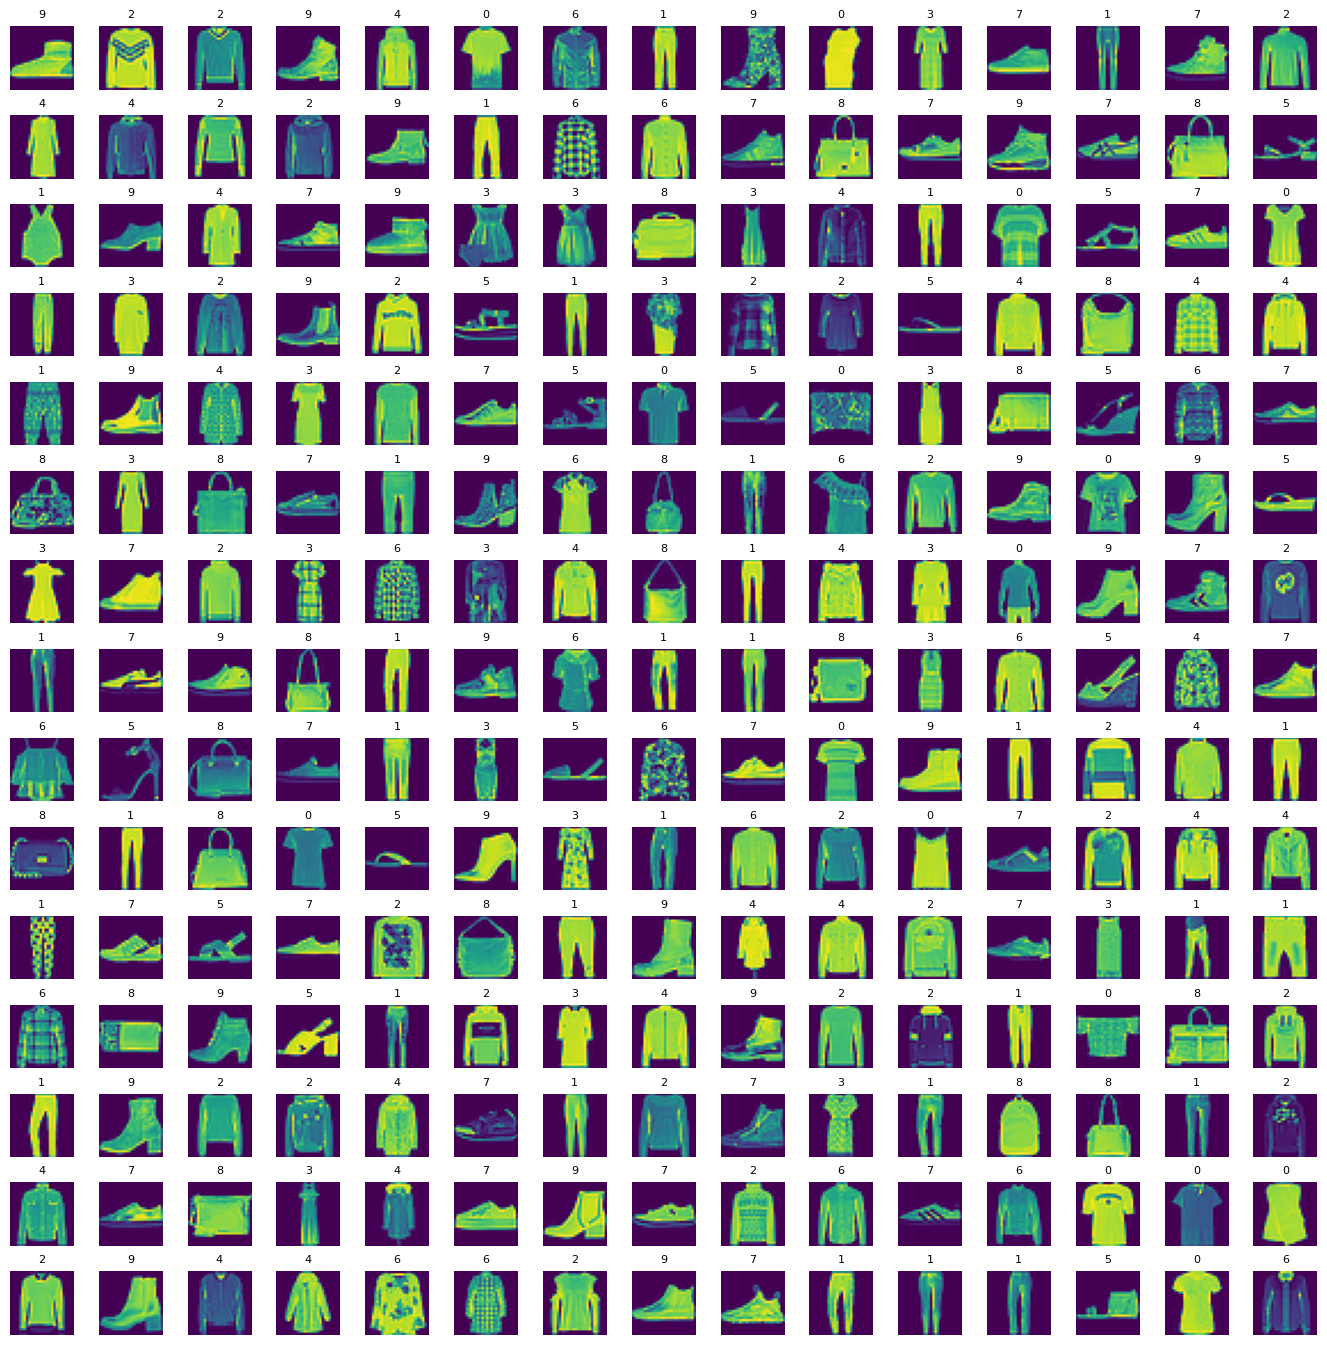

In [163]:
# Menampilkan lebih banyak gambar dalam format grid
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# STEP #3: PERFORM DATA PREPROCESSING

In [164]:
# Normalisasi data
X_train = X_train / 255
X_test = X_test / 255

In [165]:
# Menambahkan noise ke gambar
noise_factor = 0.3
noise_dataset = []

for img in X_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_dataset.append(noisy_image)

In [166]:
noise_dataset = np.array(noise_dataset)


In [167]:
noise_dataset.shape

(60000, 28, 28)

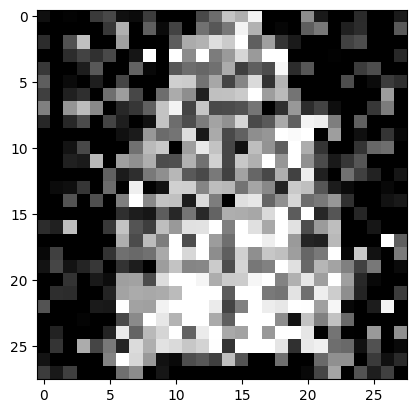

In [168]:
plt.imshow(noise_dataset[22], cmap="gray")

In [169]:
# Menambahkan noise ke data test
noise_test_set = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image, 0., 1.)
    noise_test_set.append(noisy_image)

noise_test_set = np.array(noise_test_set)

# STEP #4: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [170]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same"))

# Decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same"))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))


In [171]:
# Kompilasi model
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
autoencoder.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 14, 14, 16)     │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 28, 28, 1)      │           145 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [172]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
                X_train.reshape(-1, 28, 28, 1),
                epochs=10,
                batch_size=200,
                validation_data=(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.4984 - val_loss: 0.3272
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3201 - val_loss: 0.3133
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3096 - val_loss: 0.3087
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3058 - val_loss: 0.3067
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3040 - val_loss: 0.3056
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3032 - val_loss: 0.3049
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3030 - val_loss: 0.3044
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3022 - val_loss: 0.3041
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3018 - val_loss: 0.3037
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3010 - val_loss: 0.3033


# STEP #5: EVALUATE TRAINED MODEL PERFORMANCE

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3033
Test Accuracy : 0.303
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


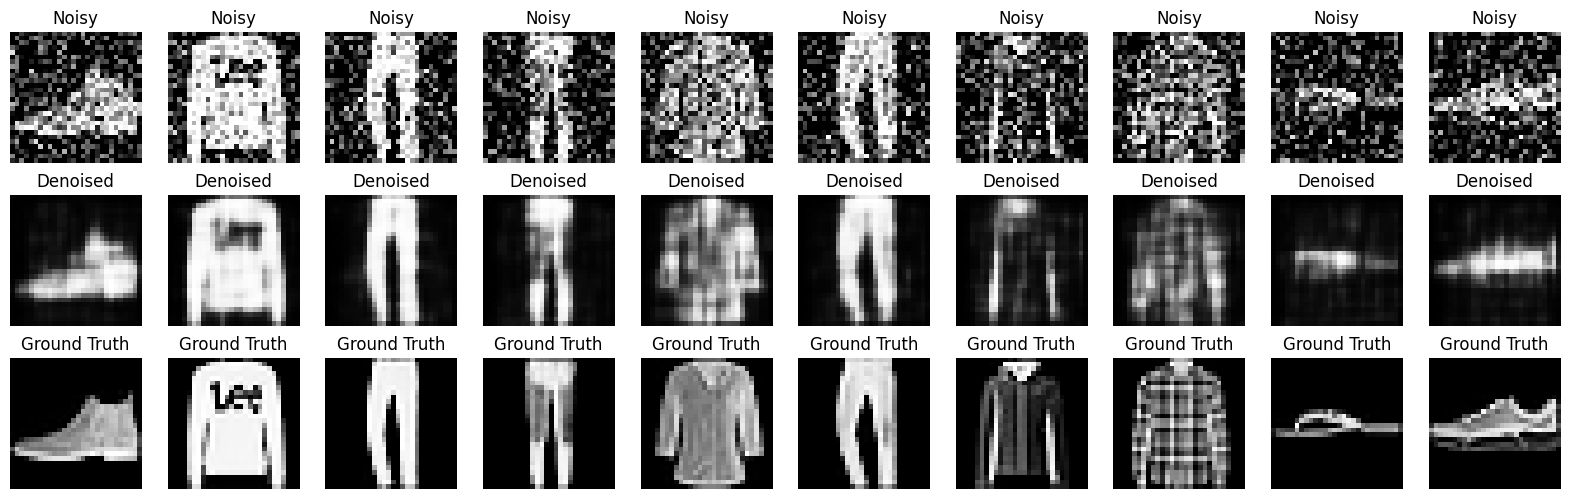

In [173]:
# Evaluasi model
evaluation = autoencoder.evaluate(noise_test_set.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1))
print('Test Accuracy : {:.3f}'.format(evaluation))

# Memprediksi dengan model autoencoder
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

# Menampilkan hasil gambar noisy, denoised dan ground truth
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Gambar noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(noise_test_set[i].reshape(28, 28), cmap="Greys_r")
    plt.title("Noisy")
    plt.axis("off")

    # Gambar hasil denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(predicted[i].reshape(28, 28), cmap="Greys_r")
    plt.title("Denoised")
    plt.axis("off")

    # Gambar ground truth
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test[i].reshape(28, 28), cmap="Greys_r")
    plt.title("Ground Truth")
    plt.axis("off")

plt.show()


In [48]:
predicted = autoencoder.predict(noise_test_set[:10].reshape(-1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [175]:
predicted.shape

(10, 28, 28, 1)

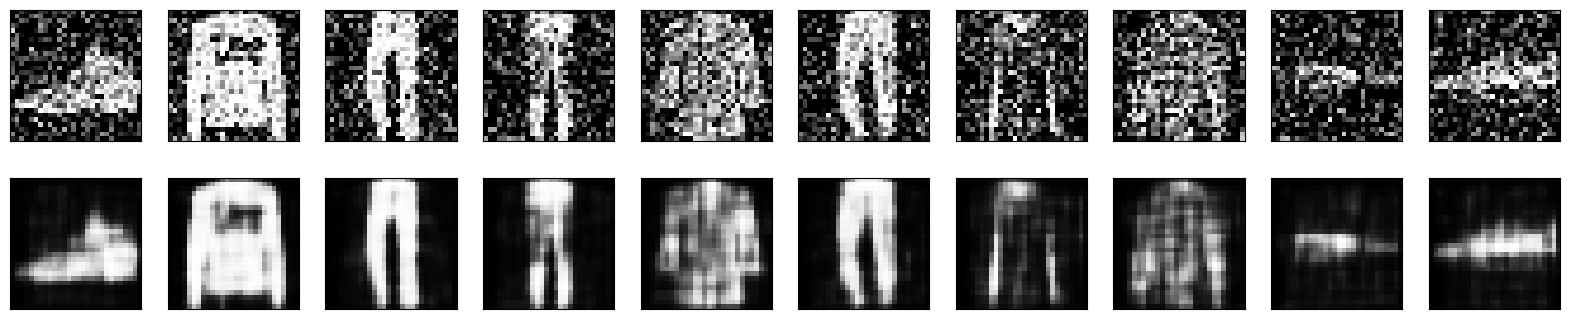

In [176]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


# EXCELLENT WORK!